In [13]:
### find breakpoints

In [5]:
import pandas as pd
import pwlf

In [6]:
df_composer = pd.read_csv("complexity_and_accumulation_for_composer_7segments_RMSE.csv")

In [7]:
# Prepare the data for pwlf
x = df_composer['accumulative_raw'].values
y = df_composer['complexity_raw'].values

In [8]:
# Fit piecewise linear model with a chosen number of segments
my_pwlf = pwlf.PiecewiseLinFit(x, y)
num_segments = 7
breakpoints = my_pwlf.fit(num_segments)

breakpoints

array([1.67310000e+02, 1.48556767e+05, 6.80479564e+05, 2.08952714e+06,
       2.68039621e+06, 3.23954027e+06, 5.74695437e+06, 9.23690364e+06])

In [14]:
### plot the graph 

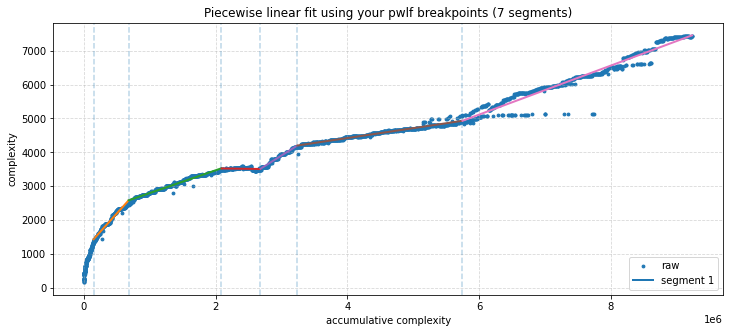

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("complexity_and_accumulation_for_composer_7segments_RMSE.csv")
x = df['accumulative_raw'].to_numpy(dtype=float)
y = df['complexity_raw'].to_numpy(dtype=float)

# Sort by x just in case
order = np.argsort(x)
x = x[order]
y = y[order]

# >>> Use the breakpoints you found with pwlf <<<
breakpoints = np.array([
    1.67310000e+02,
    1.48556767e+05,
    6.80479564e+05,
    2.08952714e+06,
    2.68039621e+06,
    3.23954027e+06,
    5.74695437e+06,
    9.23690364e+06,
])

# Plot raw data
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=8, label='raw')

# For each segment, fit a simple linear model on points within breakpoint interval and plot the line
for i in range(len(breakpoints)-1):
    x0, x1 = breakpoints[i], breakpoints[i+1]
    mask = (x >= x0) & (x <= x1)
    if mask.sum() < 2:
        continue
    Xi = x[mask]
    Yi = y[mask]
    X1 = np.vstack([np.ones_like(Xi), Xi]).T
    beta, *_ = np.linalg.lstsq(X1, Yi, rcond=None)
    a, b = beta[0], beta[1]
    xs = np.linspace(Xi.min(), Xi.max(), 200)
    ys = a + b*xs
    plt.plot(xs, ys, linewidth=2, label=f'segment {i+1}' if i==0 else None)

# draw vertical lines at breakpoints (except first & last if out of range)
for bp in breakpoints[1:-1]:
    plt.axvline(bp, linestyle='--', alpha=0.3)

plt.title('Piecewise linear fit using your pwlf breakpoints (7 segments)')
plt.xlabel('accumulative complexity')
plt.ylabel('complexity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()